# Credit Card Fraud Detection Model:
## Isolation Forest, Local Outlier Factor, One-Class Support Vector Machine (SVM)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


In [2]:
df_all = pd.read_csv('creditcard.csv')

In [3]:
df_all.shape

(284807, 31)

In [4]:
# Size of data frame is reduced
df = df_all.sample(frac=0.1, random_state=0)

In [5]:
# Prints columns of data frame ‘df’
df.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Prints total number of unique elements in each column
df.nunique() 

Time      25663
V1        28255
V2        28255
V3        28255
V4        28255
V5        28255
V6        28255
V7        28255
V8        28255
V9        28255
V10       28255
V11       28255
V12       28255
V13       28255
V14       28255
V15       28255
V16       28255
V17       28255
V18       28255
V19       28255
V20       28255
V21       28255
V22       28255
V23       28255
V24       28255
V25       28255
V26       28255
V27       28255
V28       28255
Amount     8688
Class         2
dtype: int64

In [7]:
# Displays details of each column
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94624.571469,-0.013973,0.009627,0.001210,-0.005857,0.010909,0.007060,-0.007018,0.005382,-0.002992,...,-0.000080,-0.006396,0.001597,-0.002036,-0.001969,0.000266,0.006361,0.000518,86.155954,0.001931
std,47446.931640,1.973774,1.636770,1.541925,1.413870,1.510075,1.385241,1.374638,1.127313,1.090270,...,0.739608,0.725211,0.608498,0.609971,0.518494,0.483552,0.432575,0.352473,275.914945,0.043903
min,12.000000,-37.558067,-39.818310,-48.325589,-5.175917,-113.743307,-19.996349,-23.189397,-27.347360,-8.630390,...,-21.620120,-8.483441,-20.794422,-2.836627,-4.541819,-1.773575,-6.695013,-15.430084,0.000000,0.000000
25%,54085.000000,-0.917056,-0.599429,-0.872797,-0.854493,-0.682814,-0.766042,-0.563945,-0.207629,-0.640716,...,-0.229524,-0.540899,-0.160754,-0.356353,-0.318073,-0.324648,-0.071010,-0.053020,5.390000,0.000000
50%,84592.000000,-0.000175,0.078507,0.193468,-0.029866,-0.045460,-0.273283,0.037992,0.023757,-0.055881,...,-0.033487,0.003342,-0.010662,0.041534,0.012034,-0.052993,0.002805,0.011618,21.940000,0.000000
75%,139067.000000,1.309767,0.814164,1.024709,0.736895,0.624493,0.400548,0.572706,0.330701,0.598923,...,0.181832,0.523925,0.148237,0.440412,0.346976,0.241419,0.094686,0.079438,75.980000,0.000000
max,172786.000000,2.454930,14.845545,3.893024,15.304184,28.762671,73.301626,120.589494,17.573712,8.272889,...,22.579714,5.712303,18.946734,4.584549,5.521140,3.415636,31.612198,15.649134,25691.160000,1.000000


In [8]:
 # Prints total number of fraudulent transactions
df[df['Class'] == 1]['Class'].count()

55

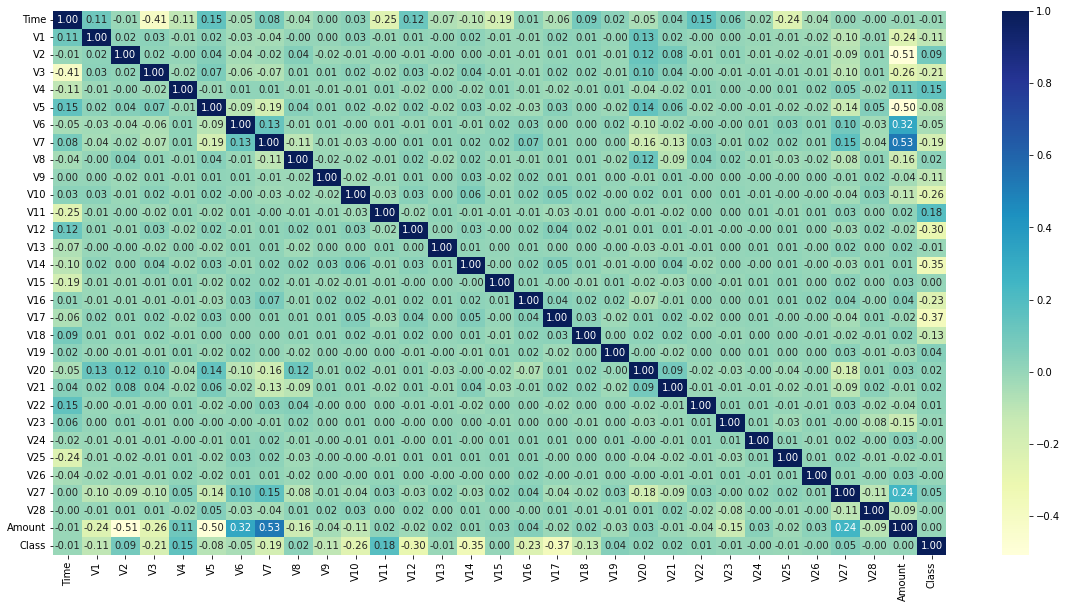

In [9]:
# Heatmap of correlation between columns of ‘df’.
plt.figure(figsize=(20,10))
#plot heat map
#g=sns.heatmap(house.corr(),annot=True,cmap="YlGnBu")
g=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", fmt=".2f")


<AxesSubplot:title={'center':'Correlation with Fraud Transaction'}>

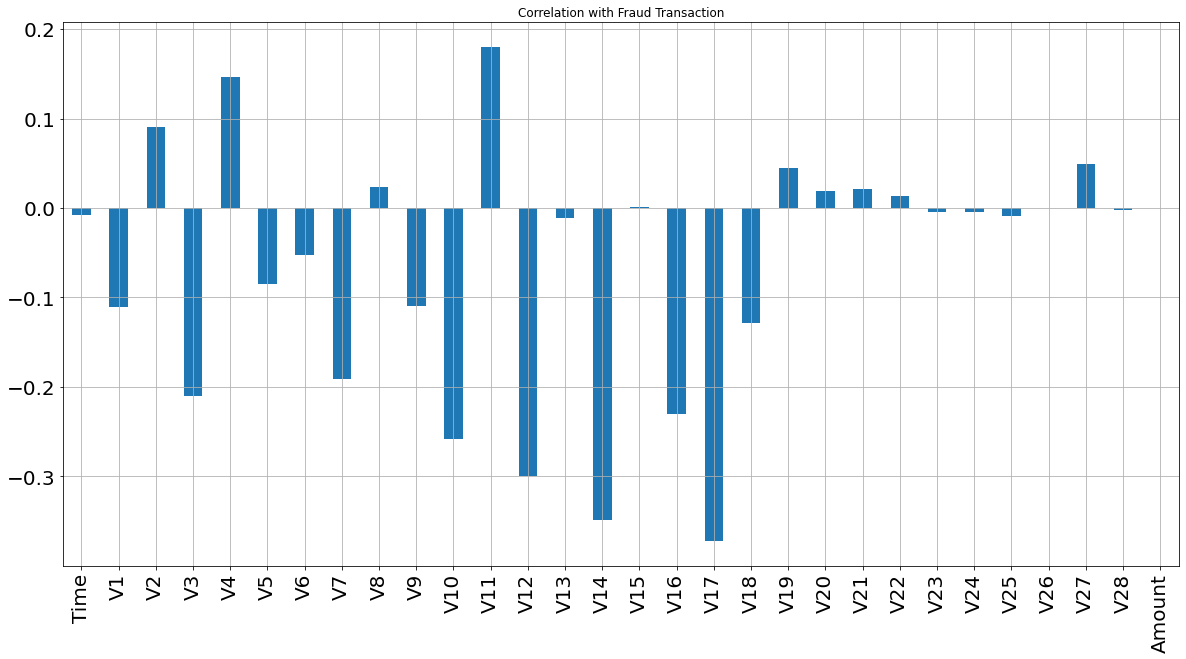

In [10]:
Feature = df.drop(['Class'],axis=1)
Feature.corrwith(df['Class']).plot.bar(figsize = (20, 10), title = "Correlation with Fraud Transaction", 
                                        fontsize = 20,rot = 90, grid = True)

In [11]:
fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))
print('Percentage of outlier:', '%.2f' % (outlier_fraction*100))

Percentage of outlier: 0.19


In [12]:
X = df.drop('Class',axis = 1)
y = df['Class']

# 1. Unsupervised Outlier Detection using Local Outlier Factor

In [13]:
#Performance of Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors = 25, contamination = outlier_fraction)

# Fitting the model
y_pred1 = lof.fit_predict(X)

# Valid transactions are labelled as 0
y_pred1[y_pred1 == 1] = 0 

# Fraudulent transactions are labelled as 1
y_pred1[y_pred1 == -1] = 1


In [14]:
acc = accuracy_score(y, y_pred1)
prec = precision_score(y, y_pred1)
rec = recall_score(y, y_pred1)
f1 = f1_score(y, y_pred1)

results_lof = pd.DataFrame([['Local Outlier Factor', acc, prec, rec, f1]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_lof

,Model,Accuracy,Precision,Recall,F1 Score
0,Local Outlier Factor,0.996243,0.035714,0.036364,0.036036


# 2. Unsupervised Outlier Detection using Isolation Forest

In [15]:
#Performance of Isolation Forest

# Fitting the model
isof = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction, random_state=0)
isof = isof.fit(X.values)

# Prediction using trained model
y_pred2 = isof.predict(X.values)

# Valid transactions are labelled as 0
y_pred2[y_pred2 == 1] = 0

# Fraudulent transactions are labelled as 1
y_pred2[y_pred2 == -1] = 1


In [16]:
acc = accuracy_score(y, y_pred2)
prec = precision_score(y, y_pred2)
rec = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)


results_isof = pd.DataFrame([['Isolation Forest', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

pd.concat([results_lof, results_isof], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score
0,Local Outlier Factor,0.996243,0.035714,0.036364,0.036036
1,Isolation Forest,0.997577,0.375000,0.381818,0.378378


# 3. Unsupervised Outlier Detection using One-Class Support Vector Machine

In [17]:
svm = OneClassSVM(nu=0.05, kernel='linear')

# Fitting the model
svm = svm.fit(X)

# Prediction using trained model
y_pred3 = svm.predict(X)

# Valid transactions are labelled as 0
y_pred3[y_pred3 == 1] = 0

# Fraudulent transactions are labelled as 1
y_pred3[y_pred3 == -1] = 1


In [18]:
acc = accuracy_score(y, y_pred3)
prec = precision_score(y, y_pred3)
rec = recall_score(y, y_pred3)
f1 = f1_score(y, y_pred3)


results_svm = pd.DataFrame([['One-Class SVM', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

pd.concat([results_lof, results_isof, results_svm], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score
0,Local Outlier Factor,0.996243,0.035714,0.036364,0.036036
1,Isolation Forest,0.997577,0.375000,0.381818,0.378378
2,One-Class SVM,0.948597,0.005614,0.145455,0.010811


### Conclusion:
### Isolation Forest outperforms significantly both Local Outlier Factor and One-Class SVM Models in terms of precision, recall, and F1 score.